# Quantum PCA 

We will implement an effective qPCA algorithm to price financial derivites in the DAX German stock index 

In [79]:
import numpy as np
from scipy.linalg import expm
from qiskit import *
import pandas as pd

# DAX 30 GERMAN

In [80]:
url = "https://raw.githubusercontent.com/ibonreinoso/qiskit-hackathon-bilbao-19/master/DAX_PERFORMANCE_INDEX.csv"
data = pd.read_csv(url, sep=';')

In [81]:
data = data.drop(['wkn_500340'], axis = 1)
data = data.loc[:,['wkn_515100', 'wkn_575200']]
print(data)

      wkn_515100  wkn_575200
0         21.450       22.67
1         21.780       23.35
2         21.750       23.37
3         22.240       23.69
4         22.290       23.70
5         22.025       23.70
6         21.900       23.60
7         21.935       23.45
8         21.975       23.36
9         21.675       23.05
10        21.925       22.93
11        22.025       22.98
12        21.950       22.85
13        21.900       22.61
14        21.950       22.62
15        22.000       22.52
16        21.950       22.35
17        21.935       22.21
18        21.775       21.85
19        21.825       22.20
20        21.950       22.20
21        21.575       21.80
22        21.550       21.58
23        21.275       21.30
24        21.600       21.48
25        21.625       21.21
26        22.095       21.94
27        22.100       22.08
28        22.035       21.98
29        22.225       22.00
...          ...         ...
1077      39.390       53.94
1078      39.470       54.51
1079      39.9

In [82]:
sigma2 = np.cov(data.values.T)
rho2 = sigma2 /np.matrix.trace(sigma2)
print(rho2)

[[0.30676853 0.44383242]
 [0.44383242 0.69323147]]


In [83]:
eigenvalues,(eigenvector1, eigenvector2)= np.linalg.eigh(rho2)
print(eigenvalues, eigenvector1, eigenvector2)

[0.01592809 0.98407191] [-0.83641475  0.54809704] [0.54809704 0.83641475]


In [84]:
eigenvector1.dot(rho2)

array([-0.01332249,  0.00873014])

In [85]:
eigenvector1 * eigenvalues[0]

array([-0.01332249,  0.00873014])

In [121]:
NUM_QUBITS = 3
NUM_ITERATION = 1000
ACCURACY = 0.1
SHOTS_PER_ITERATION = 8192
backend = BasicAer.get_backend('qasm_simulator')
sigma2 = np.array([(1.89,0.97), (0.97, 1.06)])
rho2 = sigma2 /np.matrix.trace(sigma2)
#state_vector = [ 1/np.sqrt(2), 1/np.sqrt(2)]
state_vector = [1,0]
iterate = True

list_states_vector = list()

for i in range(0, 100):
    quantum_circuit = QuantumCircuit(NUM_QUBITS, NUM_QUBITS)
    quantum_circuit.initialize(state_vector, NUM_QUBITS-1)
    quantum_circuit.h(0)
    quantum_circuit.h(1)
    (th1, ph1, lam1) = qiskit.quantum_info.synthesis.two_qubit_decompose.euler_angles_1q(expm(2*1j*np.pi*rho2))
    quantum_circuit.cu3(th1, ph1, lam1, 1, 2)
    (th2, ph2, lam2) = qiskit.quantum_info.synthesis.two_qubit_decompose.euler_angles_1q(expm(2*1j*np.pi*rho2*2))
    quantum_circuit.cu3(th2, ph2, lam2, 0, 2)
    quantum_circuit.h(0)
    quantum_circuit.crz(-np.pi/2,0,1)
    quantum_circuit.h(1)
    quantum_circuit.measure([0,1,2],[0,1,2])
    results = execute(quantum_circuit, backend=backend, shots=SHOTS_PER_ITERATION).result().get_counts()
    denominator_result = results['111'] + results['011']
    alpha1 = np.sqrt(results['011'] / denominator_result)
    alpha2 = np.sqrt(results['111'] / denominator_result)
    new_state = [alpha1, alpha2]
    # check the acc 
    state_vector = new_state
    list_states_vector.append(state_vector)

In [117]:
print(results['111'])
print(results)
print(state_vector)

43
{'001': 28, '010': 279, '110': 117, '000': 5366, '101': 25, '011': 87, '111': 43, '100': 2247}
[0.818065259762795, 0.5751254043851921]


In [107]:
print(state_vector, eigenvector1)

[0.849552311770607, 0.5275043787166296] [-0.83641475  0.54809704]


In [118]:
import matplotlib.pyplot as plt

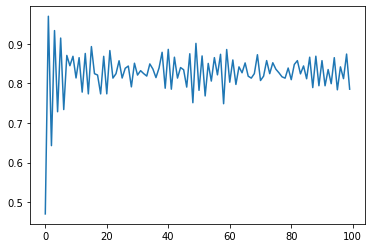

In [122]:
plt.plot(np.array(list_states_vector).T[0])

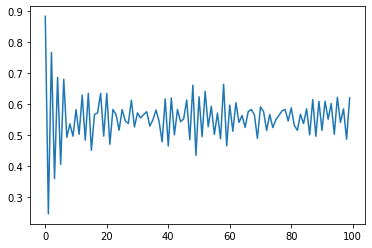

In [123]:
plt.plot(np.array(list_states_vector).T[1])

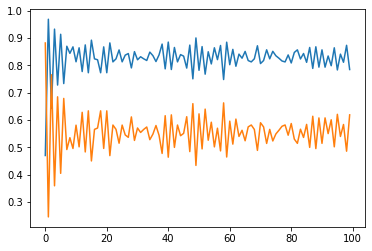

In [124]:
plt.plot(list_states_vector)

In [111]:
np.array(list_states_vector).T

array([[0.90166963, 0.78446454, 0.81486195, 0.85485041, 0.87266171,
        0.83484711, 0.8304548 , 0.84983659, 0.83497491, 0.79240582,
        0.82395333, 0.84887469, 0.79959006, 0.86243936, 0.86255435,
        0.85465477, 0.84256968, 0.79818342, 0.86276353, 0.82717019,
        0.84515425, 0.83484711, 0.85063343, 0.81361651, 0.80253835,
        0.82102014, 0.84852814, 0.8261596 , 0.82171386, 0.86255435,
        0.81184414, 0.85411252, 0.81319759, 0.82945765, 0.83827364,
        0.81649658, 0.84719652, 0.81992006, 0.83717065, 0.80757285,
        0.8824744 , 0.78322754, 0.89100681, 0.76412867, 0.89027669,
        0.82547921, 0.84574096, 0.84794355, 0.88699758, 0.79811422,
        0.86357554, 0.77564555, 0.90230776, 0.77055175, 0.88014083,
        0.80178373, 0.83925433, 0.83452296, 0.83484711, 0.82649779,
        0.86103386, 0.8412445 , 0.84577093, 0.86120071, 0.80039053,
        0.8824333 , 0.79240582, 0.80178373, 0.84983659, 0.82000841,
        0.83553169, 0.85194275, 0.82112266, 0.81